In [19]:
import sys
import itertools
import random
import time
import statistics
import math
import csv

# Constants
TEST_COUNT = 100
BIN_SIZE = 10
ITEM_COUNT_STEP = 100
ITEM_COUNT_MAX = 2100
TVAL90 = 1.645

# Function to compute best fit
# (Code for the bestFit() function and other functions remain the same)

def calculate_confidence_interval(data):
    mean = statistics.mean(data)
    stdev = statistics.stdev(data)
    n = len(data)
    t_value = 1.960  # For a 90% confidence interval with a large sample size
    margin_of_error = t_value * (stdev / math.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    lower_bound_percentage = (lower_bound / mean) / 10
    upper_bound_percentage = (upper_bound / mean) / 10
    return lower_bound_percentage, upper_bound_percentage

def calculate_standard_error(data):
    stdev = statistics.stdev(data)
    n = len(data)
    standard_error = stdev / math.sqrt(n)
    return standard_error

def run_and_record(num_runs):
    data = []
    cumulative_time = 0
    for num in num_runs:
        instances = generate_instances(num, (5, 10), (4, 15))
        total_times = []
        for bin_capacity, items in instances:
            start_time = time.time()
            bins = best_fit(items, bin_capacity)
            end_time = time.time()
            processing_time = end_time - start_time
            total_times.append(processing_time)
        cumulative_time += sum(total_times)
        lower_bound, upper_bound = calculate_confidence_interval(total_times)
        stdev = statistics.stdev(total_times)
        standard_error = calculate_standard_error(total_times)
        data.append((num, cumulative_time, lower_bound, upper_bound, stdev, standard_error))
    return data

# Run the code multiple times and record the processing time
num_runs = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
results = run_and_record(num_runs)



In [20]:
#CREATE THE TABLE*****************************************************************
# Output the results in CSV format
with open('performance_analysis.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Num Runs', 'Processing Time', '90% CI Lower Bound', '90% CI Upper Bound', 'Standard Deviation', 'Standard Error'])
    for num, total_time, lower_bound, upper_bound, stdev, standard_error in results:
        writer.writerow([num, total_time, lower_bound, upper_bound, stdev, standard_error])


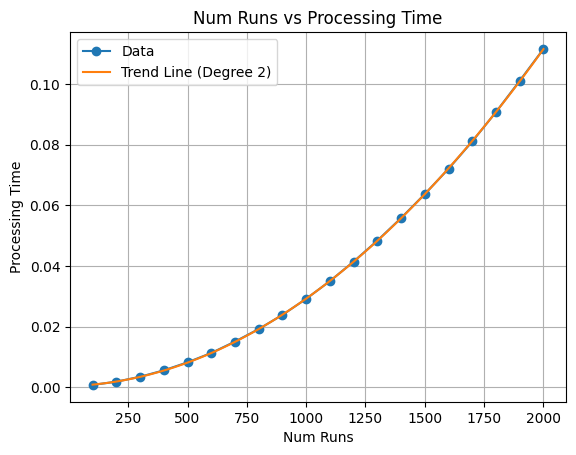

In [21]:
#DRAWING THE GRAPH******************************************************************

import csv
import matplotlib.pyplot as plt
import numpy as np

# Read data from CSV file
num_runs = []
processing_time = []
with open('performance_analysis.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        num_runs.append(int(row['Num Runs']))
        processing_time.append(float(row['Processing Time']))

# Polynomial regression
coefficients = np.polyfit(num_runs, processing_time, 2)
trend_line = np.poly1d(coefficients)
x_range = np.linspace(min(num_runs), max(num_runs), 100)
y_range = trend_line(x_range)

# Plotting the graph
plt.plot(num_runs, processing_time, marker='o', label='Data')
plt.plot(x_range, y_range, label='Trend Line (Degree 2)')
plt.xlabel('Num Runs')
plt.ylabel('Processing Time')
plt.title('Num Runs vs Processing Time')
plt.legend()
plt.grid(True)
plt.show()
